<a href="https://colab.research.google.com/github/tcotte/CNN_Pytorch/blob/master/different_arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tcotte/CNN_Pytorch

fatal: destination path 'CNN_Pytorch' already exists and is not an empty directory.


In [2]:
%cd /content/CNN_Pytorch

/content/CNN_Pytorch


In [3]:
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

if cuda:
    torch.cuda.manual_seed(SEED)

### Transformations

In [4]:
from torchvision import transforms

AlexTransform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

NetTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))                               
])

### Load dataset

In [5]:
import os
import torchvision

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

batch_size=256
dataset_dir = os.path.join(os.path.expanduser("~"), 'Datasets', 'FashionMNIST')

# Load the dataset for alexnet arch
train_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= AlexTransform,
                                           download=True)

test_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= AlexTransform,
                                           download=True)

train_loader_alex = torch.utils.data.DataLoader(dataset=train_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_alex = torch.utils.data.DataLoader(dataset=test_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)
# Load the dataset for lenet arch
train_dataset_lenet = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= NetTransform,
                                           download=True)

test_dataset_lenet = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= NetTransform,
                                           download=True)

train_loader_lenet = torch.utils.data.DataLoader(dataset=train_dataset_lenet,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_lenet = torch.utils.data.DataLoader(dataset=test_dataset_lenet,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

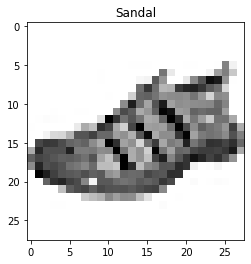

In [6]:
from functions.plot_picture import matplotlib_imshow

# get some random training images
dataiter = iter(train_loader_lenet)

images, labels = dataiter.next()

# # creat grid of images
img_grid = torchvision.utils.make_grid(images[0])

# # show images & labels
matplotlib_imshow(img_grid, class_names[labels[0]])

### Train all models on 10 epochs

In [7]:
from functions.training import train_model, evaluate_model
from models.alexnet_arch import AlexNet
from models.lenet_arch import Model_Type_LeNet
import torch.optim as optim

EPOCHS = 10
losses_an = []
accuracies_an = []
nb_batch = int(np.ceil(len(train_loader_alex.dataset)/batch_size))

alexnet_model = AlexNet()

optimizer = optim.Adam(alexnet_model.parameters(),  lr=0.001)

alexnet_model.to(device)

for epoch in range(EPOCHS):
  losses_an.extend(train_model(train_loader_alex, device, alexnet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_an.append(evaluate_model(alexnet_model, device, test_loader_alex, losses_an[-1], EPOCHS, epoch, batch_size, len(train_loader_alex.dataset)))

 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.437140	 Test Accuracy: 84.2300%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.418220	 Test Accuracy: 85.1100%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.426819	 Test Accuracy: 86.8200%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.327940	 Test Accuracy: 87.6400%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.392613	 Test Accuracy: 88.6600%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.226905	 Test Accuracy: 88.9200%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.309313	 Test Accuracy: 88.5500%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.243801	 Test Accuracy: 88.4500%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.223417	 Test Accuracy: 89.8500%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.351361	 Test Accuracy: 87.9200%


In [8]:
from models.lenet_arch import Model_Type_LeNet
import torch.optim as optim

EPOCHS = 10
losses_ln = []
accuracies_ln = []

lenet_model = Model_Type_LeNet()

optimizer = optim.Adam(lenet_model.parameters(),  lr=0.001)

lenet_model.to(device)

for epoch in range(EPOCHS):
  losses_ln.extend(train_model(train_loader_lenet, device, lenet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_ln.append(evaluate_model(lenet_model, device, test_loader_lenet, losses_ln[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/content/CNN_Pytorch/models/lenet_arch.py:64: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  sm = nn.functional.log_softmax(out, _stacklevel=3)


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.652788	 Test Accuracy: 80.0400%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.437738	 Test Accuracy: 84.8400%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.339020	 Test Accuracy: 85.3400%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.225822	 Test Accuracy: 86.6300%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.312838	 Test Accuracy: 87.2100%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.319833	 Test Accuracy: 86.7900%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.250078	 Test Accuracy: 87.5200%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.249988	 Test Accuracy: 87.6800%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.299817	 Test Accuracy: 87.7300%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 87.7200%


### Dataframes

In [9]:
losses_ln[234+235]

0.43773844838142395

In [10]:
def filter_losses(losses, EPOCHS):
  losses_filtered = []
  for i in range(EPOCHS):
    if i==0:
      losses_filtered.append(losses[nb_batch-1])
    else:
      losses_filtered.append(losses[nb_batch-1+nb_batch*i])
  return losses_filtered

In [11]:
len(accuracies_ln)

10

In [12]:
import pandas as pd 

d = {('AlexNet architecture', 'accuracy'): accuracies_an,
     ('AlexNet architecture', 'loss'): filter_losses(losses_an, EPOCHS),
     ('LeNet architecture','accuracy'): accuracies_ln,
     ('LeNet architecture','loss'): filter_losses(losses_ln, EPOCHS)
}
l=[('AlexNet architecture', 'accuracy'),  ('AlexNet architecture', 'loss'), ('LeNet architecture','accuracy'),  ('LeNet architecture','loss')]
df = pd.DataFrame(data=d, columns = l)

df.columns = pd.MultiIndex.from_tuples(df.columns, names=['',''])
df

AlexNet architecture           LeNet architecture          
              accuracy      loss           accuracy      loss
0               0.8423  0.437140             0.8004  0.652788
1               0.8511  0.418220             0.8484  0.437738
2               0.8682  0.426819             0.8534  0.339020
3               0.8764  0.327940             0.8663  0.225822
4               0.8866  0.392613             0.8721  0.312838
5               0.8892  0.226905             0.8679  0.319833
6               0.8855  0.309313             0.8752  0.250078
7               0.8845  0.243801             0.8768  0.249988
8               0.8985  0.223417             0.8773  0.299817
9               0.8792  0.351361             0.8772  0.339610

In [13]:
#Save the df
df.to_csv('csv/differences_on_fashion.csv')


No handles with labels found to put in legend.


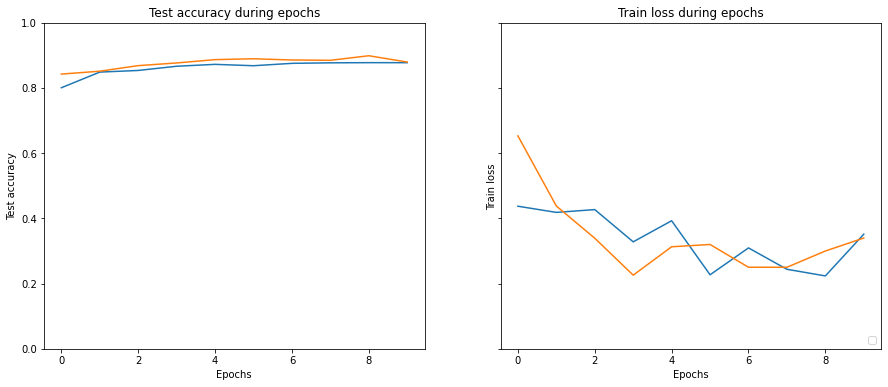

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))

ax1.plot(np.arange(EPOCHS), accuracies_ln)
ax1.plot(np.arange(EPOCHS), accuracies_an)
ax2.plot(np.arange(EPOCHS), filter_losses(losses_an, EPOCHS))
ax2.plot(np.arange(EPOCHS), filter_losses(losses_ln, EPOCHS))
plt.ylim(0,1)
ax1.set_title("Test accuracy during epochs")
ax2.set_title("Train loss during epochs")

for ax in [ax1, ax2]:
  ax.set_xlabel("Epochs")

ax1.set_ylabel("Test accuracy")
ax2.set_ylabel("Train loss")

plt.legend(loc='lower right')

###Differences between maxpooling and avgpooling

In [15]:
from models.custom_arch import *

In [16]:
losses_max = []
accuracies_max = []

model = Model_Max_Pool()

optimizer = optim.Adam(model.parameters(),  lr=0.001)


model.to(device)

for epoch in range(EPOCHS):
  losses_max.extend(train_model(train_loader_lenet, device, model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_max.append(evaluate_model(model, device, test_loader_lenet, losses_ln[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/content/CNN_Pytorch/models/custom_arch.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  sm = nn.functional.log_softmax(out, _stacklevel=3)


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 84.7600%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 85.3600%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 85.7000%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 86.5200%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 87.1200%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 86.6300%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 87.3000%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 87.0200%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 87.7300%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.339610	 Test Accuracy: 87.2900%


In [17]:
len(losses_max)

2350

In [18]:
import pandas as pd 

d = {('Max pooling', 'accuracy'): accuracies_max,
     ('Max pooling', 'loss'): filter_losses(losses_max, EPOCHS),
     ('Average pooling','accuracy'): accuracies_ln,
     ('Average pooling','loss'): filter_losses(losses_ln, EPOCHS)
}
l=[('Max pooling', 'accuracy'),  ('Max pooling', 'loss'), ('LeNet architecture','accuracy'),  ('LeNet architecture','loss')]
df = pd.DataFrame(data=d, columns = l)

df.columns = pd.MultiIndex.from_tuples(df.columns, names=['',''])

### Model with multiples fully connected layers

In [19]:
from models.lenet_arch import Model_Type_LeNet
import torch.optim as optim

EPOCHS = 10
losses_m_fc = []
accuracies_m_fc = []

model = Model_Multiple_fc()

optimizer = optim.Adam(model.parameters(),  lr=0.001)

model.to(device)

for epoch in range(EPOCHS):
  losses_m_fc.extend(train_model(train_loader_lenet, device, model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_m_fc.append(evaluate_model(model, device, test_loader_lenet, losses_m_fc[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/content/CNN_Pytorch/models/custom_arch.py:118: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  sm = nn.functional.log_softmax(out, _stacklevel=3)


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.589148	 Test Accuracy: 78.0900%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.445659	 Test Accuracy: 83.0600%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 3.911996	 Test Accuracy: 10.0000%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 2.384350	 Test Accuracy: 10.0000%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 2.332937	 Test Accuracy: 10.0000%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 2.314796	 Test Accuracy: 9.9800%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 2.334633	 Test Accuracy: 10.0000%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 2.323832	 Test Accuracy: 10.0000%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 2.313034	 Test Accuracy: 10.0000%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 2.306831	 Test Accuracy: 10.0000%


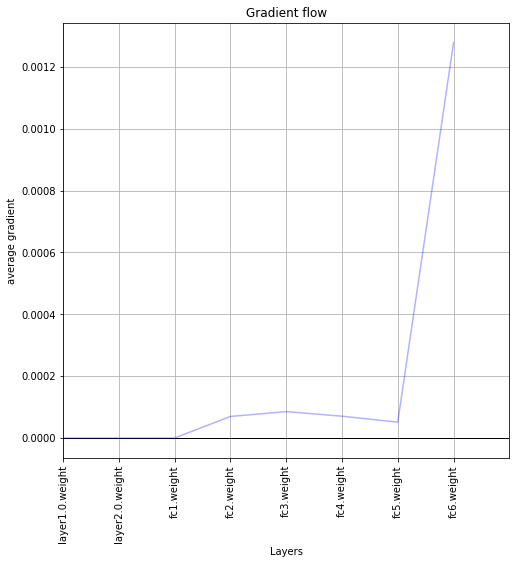

In [20]:
from functions.plot_model import plot_grad_flow
layers = []
for n, p in model.named_parameters():
    if(p.requires_grad) and ("bias" not in n):
        layers.append(n)
fig = plt.figure(figsize=(8,8))
ax = fig.subplots()
plt.xlabel("mini batch")
plt.ylabel("Average Gradient")
plt.title("Gradient Flow")
plt.grid(True)

plot_grad_flow(model.named_parameters())

###One large fully connected layer

In [21]:
losses_big_fc = []
accuracies_big_fc = []

model = Model_Big_fc()

optimizer = optim.Adam(model.parameters(),  lr=0.001)

model.to(device)

for epoch in range(EPOCHS):
  losses_big_fc.extend(train_model(train_loader_lenet, device, model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_big_fc.append(evaluate_model(model, device, test_loader_lenet, losses_big_fc[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/content/CNN_Pytorch/models/custom_arch.py:151: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  sm = nn.functional.log_softmax(out, _stacklevel=3)


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.551676	 Test Accuracy: 79.3800%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.713597	 Test Accuracy: 79.4900%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.477113	 Test Accuracy: 82.6300%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.377483	 Test Accuracy: 83.5700%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.564706	 Test Accuracy: 85.7200%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.318646	 Test Accuracy: 83.4900%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.402811	 Test Accuracy: 84.7900%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.506974	 Test Accuracy: 83.5600%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.339371	 Test Accuracy: 85.8000%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.454887	 Test Accuracy: 82.8000%


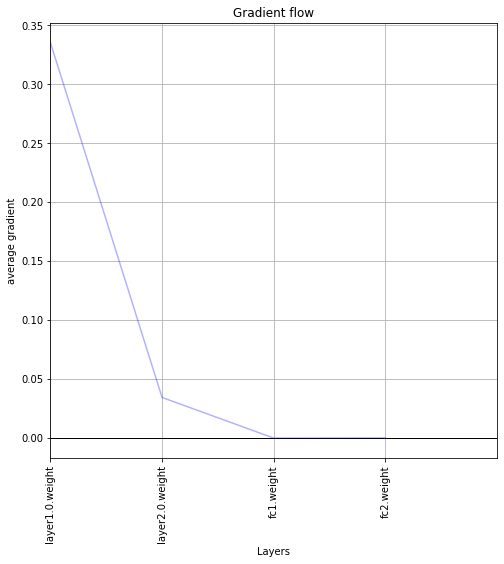

In [22]:
from functions.plot_model import plot_grad_flow
layers = []
for n, p in model.named_parameters():
    if(p.requires_grad) and ("bias" not in n):
        layers.append(n)
fig = plt.figure(figsize=(8,8))
ax = fig.subplots()
plt.xlabel("mini batch")
plt.ylabel("Average Gradient")
plt.title("Gradient Flow")
plt.grid(True)

plot_grad_flow(model.named_parameters())

### Deep CNN model

In [23]:
EPOCHS = 10
losses_d_cnn = []
accuracies_d_cnn = []

model = Model_Deep_CNN()

optimizer = optim.Adam(model.parameters(),  lr=0.001)

model.to(device)

for epoch in range(EPOCHS):
  losses_d_cnn.extend(train_model(train_loader_lenet, device, model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_d_cnn.append(evaluate_model(model, device, test_loader_lenet, losses_d_cnn[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/content/CNN_Pytorch/models/custom_arch.py:191: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  sm = nn.functional.log_softmax(out, _stacklevel=3)


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.324596	 Test Accuracy: 85.0300%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.363874	 Test Accuracy: 83.2200%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.243104	 Test Accuracy: 86.5900%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.484624	 Test Accuracy: 88.1800%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.270162	 Test Accuracy: 88.3000%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.189887	 Test Accuracy: 88.2000%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.281349	 Test Accuracy: 88.5800%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.387248	 Test Accuracy: 88.4500%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.164121	 Test Accuracy: 88.2200%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.161164	 Test Accuracy: 88.7600%


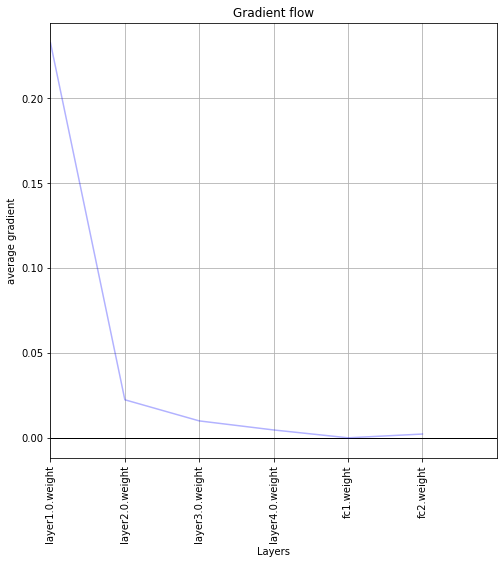

In [24]:
from functions.plot_model import plot_grad_flow
layers = []
for n, p in model.named_parameters():
    if(p.requires_grad) and ("bias" not in n):
        layers.append(n)
fig = plt.figure(figsize=(8,8))
ax = fig.subplots()
plt.xlabel("mini batch")
plt.ylabel("Average Gradient")
plt.title("Gradient Flow")
plt.grid(True)

plot_grad_flow(model.named_parameters())

In [25]:
len(losses_d_cnn)

2350

### ResNet50

In [26]:
import torchvision.models as models
model_resnet = models.resnet50(pretrained=True)

In [27]:
for params in model.parameters():
    params.requires_grad = False

classifier = nn.Sequential(nn.Linear(2048, 512),
                           nn.ReLU(),
                           nn.Dropout(p=0.2),
                           nn.Linear(512, 102),
                           nn.LogSoftmax(dim=1))

model_resnet.fc = classifier

In [29]:
optimizer = optim.Adam(model_resnet.fc.parameters(), lr=0.001)

In [30]:
ResnetTransform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset_resnet = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= ResnetTransform,
                                           download=True)

test_dataset_resnet = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= ResnetTransform,
                                           download=True)

train_loader_resnet = torch.utils.data.DataLoader(dataset=train_dataset_resnet,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_resnet = torch.utils.data.DataLoader(dataset=test_dataset_resnet,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

In [36]:
from functions.training import train_model, evaluate_model

losses_res = []
accuracies_res = []
EPOCHS = 10
batch_size = 256
nb_batch = int(np.ceil(len(train_loader_resnet.dataset)/batch_size))

model_resnet.to(device)

for epoch in range(EPOCHS):
  losses_res.extend(train_model(train_loader_resnet, device, model_resnet, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_res.append(evaluate_model(model_resnet, device, test_loader_resnet, losses_res[-1], EPOCHS, epoch, batch_size, len(train_loader_resnet.dataset)))

RuntimeError: ignored

###Stack all results in graph and dataframe

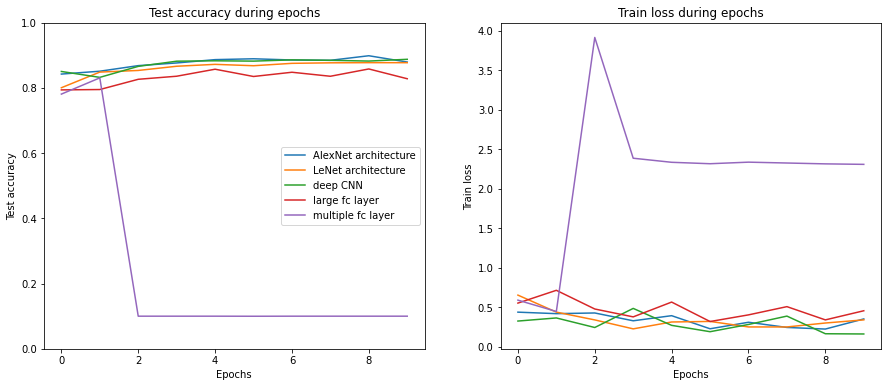

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,6))


ax1.plot(np.arange(EPOCHS), accuracies_an, label="AlexNet architecture")
ax1.plot(np.arange(EPOCHS), accuracies_ln, label="LeNet architecture")
ax1.plot(np.arange(EPOCHS), accuracies_d_cnn, label="deep CNN")
ax1.plot(np.arange(EPOCHS), accuracies_big_fc, label="large fc layer")
ax1.plot(np.arange(EPOCHS), accuracies_m_fc, label="multiple fc layer")
ax2.plot(np.arange(EPOCHS), filter_losses(losses_an, EPOCHS), label="AlexNet architecture")
ax2.plot(np.arange(EPOCHS), filter_losses(losses_ln, EPOCHS), label="LeNet architecture")
ax2.plot(np.arange(EPOCHS), filter_losses(losses_d_cnn, EPOCHS), label="deep CNN")
ax2.plot(np.arange(EPOCHS), filter_losses(losses_big_fc, EPOCHS), label="large fc layer")
ax2.plot(np.arange(EPOCHS), filter_losses(losses_m_fc, EPOCHS), label="multiple fc layer")
ax1.set_ylim(0,1)
ax1.set_title("Test accuracy during epochs")
ax2.set_title("Train loss during epochs")

for ax in [ax1, ax2]:
  ax.set_xlabel("Epochs")

ax1.set_ylabel("Test accuracy")
ax2.set_ylabel("Train loss")

ax1.legend(loc='center right')


In [34]:
accuracies_d_cnn

[0.8503, 0.8322, 0.8659, 0.8818, 0.883, 0.882, 0.8858, 0.8845, 0.8822, 0.8876]

In [46]:
d = {"Accuracy deep CNN": accuracies_d_cnn,
     "Accuracy big fc": accuracies_big_fc,
     "Accuracy multi fc": accuracies_m_fc,
     "Accuracy alexnet": accuracies_an,
     "Accuracy lenet": accuracies_ln,
    #  "Accuracy resnet": accuracies_res,
     }

accuracies = pd.DataFrame(data=d)
accuracies.to_csv('csv/accuracies.csv')

In [47]:
d = {"Loss deep CNN": filter_losses(losses_d_cnn, EPOCHS),
     "Loss big fc": filter_losses(losses_big_fc, EPOCHS),
     "Loss multi fc": filter_losses(losses_m_fc, EPOCHS),
     "Loss alexnet": filter_losses(losses_an, EPOCHS),
     "Loss lenet": filter_losses(losses_ln, EPOCHS),
    #  "Loss resnet": filter_losses(losses_res, EPOCHS),
     }

losses = pd.DataFrame(data=d)
losses.to_csv('csv/losses.csv')

In [40]:
losses

,Loss deep CNN,Loss big fc,Loss multi fc,Loss alexnet,Loss lenet
0,0.324596,0.551676,0.589148,0.437140,0.652788
1,0.363874,0.713597,0.445659,0.418220,0.437738
2,0.243104,0.477113,3.911996,0.426819,0.339020
3,0.484624,0.377483,2.384350,0.327940,0.225822
4,0.270162,0.564706,2.332937,0.392613,0.312838
5,0.189887,0.318646,2.314796,0.226905,0.319833
6,0.281349,0.402811,2.334633,0.309313,0.250078
7,0.387248,0.506974,2.323832,0.243801,0.249988
8,0.164121,0.339371,2.313034,0.223417,0.299817
9,0.161164,0.454887,2.306831,0.351361,0.339610
